The Functional API
===============

https://keras.io/guides/functional_api/

In [1]:
#Setup

try:
    import tensorflow as tf
    from tensorflow import keras
    #from keras.models import Sequential
    from keras import layers
except ImportError as e:
    print(f"Error occurred while importing modules: {e}")

In [3]:
# Start by creating an input node:

try:
    inputs = layers.Input(shape=(784,))
    print("keras.layers.Input is available for use.")
    print(f"Shape of 'inputs': {inputs.shape}")
    print(f"Data type of 'inputs': {inputs.dtype}")
except (NameError, AttributeError):
    print("keras.layers.Input is not available.")

keras.layers.Input is available for use.
Shape of 'inputs': (None, 784)
Data type of 'inputs': <dtype: 'float32'>


In [4]:
# You create a new node in the graph of layers by calling a layer on this inputs object:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [5]:
# To add more layers to the graph of layers:
x = layers.Dense(64, activation='relu')(x)

In [6]:
# Define the output layer
outputs = layers.Dense(10)(x)

In [28]:
# Create the output model
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")

In [29]:
# Show a summary
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


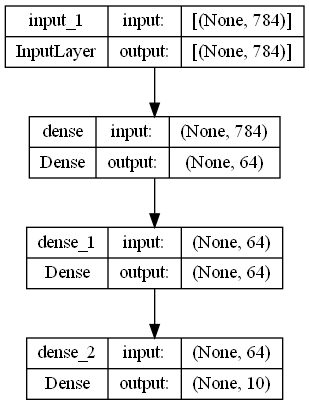

In [13]:
# Display a graphic model

import pydot
keras.utils.plot_model(model, "functional_model.png", show_shapes=True)

#API overview: a first end-to-end example
===============
When passing data to the built-in training loops of a model, you should either use NumPy arrays (if your data is small and fits in memory) or tf.data.Dataset objects. In the next few paragraphs, we'll use the MNIST dataset as NumPy arrays, in order to demonstrate how to use optimizers, losses, and metrics.

Let's consider the following model (here, we build in with the Functional API, but it could be a Sequential model or a subclassed model as well):

In [10]:
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Here's what the typical end-to-end workflow looks like, consisting of:

1. Training
2. Validation on a holdout set generated from the original training data
3. Evaluation on the test data

We'll use MNIST data for this example.

https://keras.io/guides/training_with_built_in_methods/

In [30]:
'''
This code loads the MNIST dataset using the load_data() function from keras.datasets.mnist. 
It returns four NumPy arrays: x_train, y_train, x_test, and y_test. 
x_train and x_test contain the images (pixel data) of handwritten digits, 
while y_train and y_test contain the corresponding labels (digits from 0 to 9).
'''

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
'''
The images in x_train are reshaped from 28x28 matrices to a flat array of 784 elements. 
Each image is transformed into a 1D array of pixel values. 
The astype("float32") converts the pixel values to 32-bit floating-point numbers, 
and then the pixel values are normalized by dividing them by 255. 
Normalizing the pixel values to the range [0, 1] helps in faster convergence of the neural network during training.
The same preprocessing is applied to the test set, x_test, to reshape and normalize the pixel values.
The labels y_train and y_test are converted to 32-bit floating-point numbers.
This conversion is done to ensure consistency in data types during training and evaluation.
'''

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [33]:
# Reserve 10,000 samples for validation

'''
The last 10,000 samples from the training set are separated to create a validation set. 
This validation set will be used during training to monitor the model's performance and prevent overfitting.
'''

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [34]:
y_val

array([3., 8., 6., ..., 5., 6., 8.], dtype=float32)

In [35]:
'''
The next steps are to perform the compilation and training of a neural 
network model using TensorFlow and Keras for the MNIST dataset.
The method compile configures the model for training. 
It specifies the optimizer, loss function, and evaluation metrics for the model
'''

model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
    
# The RMSprop optimizer is used for updating the model's weights during training
# The Sparse Categorical Crossentropy loss function is used for calculating the model's loss during training
# The Sparse Categorical Accuracy metric is used to monitor the accuracy of the model during training

)

The <b>optimizer</b> is responsible for updating the model's weights and biases (also known as model's parameters) 
iteratively during training process to minimize the loss function. 
The optimization process involves finding the optimal set of model parameters
that results in the smallest possible value of the loss function. 
This optimization is often performed through an iterative process known as gradient descent or its variants.
During each iteration of the training process, the optimizer calculates the gradients of the loss function with respect 
to the model's parameters. These gradients indicate the direction and magnitude of the steepest increase in the loss function.
The optimizer then uses these gradients to update the model's parameters in the opposite direction to reduce the loss. 
The magnitude of the update is controlled by a learning rate, which determines how much the model's 
parameters should change at each step.
The optimization process continues for multiple epochs, during which the optimizer repeatedly updates the model's parameters, 
gradually improving its performance on the training data.
The choice of optimizer can significantly impact the convergence speed and the quality of the model's final results. 
Some popular optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, and others

The <b>loss function</b>, also known as a cost function or objective function, is used to measure 
how well a model is performing on a given task or problem. 
It quantifies the difference between the predicted output of the model and the true target values in the training data. 
The choice of the loss function depends on the task type, such as classification or regression. 
Selecting an appropriate loss function is essential, as it guides the model to learn meaningful representations from the data.
For example, in classification tasks, the cross-entropy loss (binary or categorical) is commonly used, 
while mean squared error (MSE) loss is used for regression tasks.
The ultimate objective is to find a set of model parameters that result in the smallest possible loss, 
indicating the model's best performance on the task at hand.

<b>Evaluation metrics</b> are used to measure the model's performance during and after training. 
These metrics are useful for assessing how well the model is performing on tasks such as 
classification or regression on the validation or test set. 
Common evaluation metrics vary depending on the type of machine learning task:
<ul>
<li>Classification tasks: Accuracy, precision, recall, F1-score, ROC-AUC, etc.
</li>
<li>Regression tasks: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, etc.
</li>
</ul> 

The main purposes of evaluation metrics are as follows:
1. Model Comparison: Evaluation metrics allow you to compare the performance of different models 
and determine which one is better suited for a specific task. For example, in a binary classification task, 
you can compare the accuracy, precision, recall, and F1-score of multiple models 
to select the one with the best overall performance.
2. Model Selection: Evaluation metrics help in selecting the best model from a set of candidate models. 
A model with higher accuracy or better performance on other evaluation metrics is usually chosen for deployment.
3. Hyperparameter Tuning: Evaluation metrics are used during hyperparameter tuning 
to find the best combination of hyperparameters that maximize the model's performance.
4. Early Stopping: During training, evaluation metrics are monitored to implement early stopping. 
If the model's performance on the validation dataset does not improve or starts to deteriorate, 
training can be stopped early to avoid overfitting and save computational resources.

In [36]:
# This method trains the model on the provided training data

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

'''
x_train and y_train are the training data.
batch_size=64: The batch size determines how many samples are processed together before updating the model's weights.
epochs=2: The number of epochs is the number of times the entire dataset is passed through the model during training.
validation_data=(x_val, y_val): The validation data is used to evaluate the model's performance during training.
if you already have a specific validation dataset that is different from the training data. 
This method gives more control over the validation process and allows you to use specific data for validation 
that is not part of the training data.
But sometimes you can do it by using the validation_split argument.
It is convenient when you want to quickly allocate a portion of the training data for validation without creating 
separate validation arrays specifying the fraction of the training data to use for validation, like as validation_split=0.2
'''

Epoch 1/2
625/625 [==============================] - 2s 3ms/step - loss: 0.5309 - sparse_categorical_accuracy: 0.8443 - val_loss: 0.4922 - val_sparse_categorical_accuracy: 0.8491
Epoch 2/2
625/625 [==============================] - 1s 2ms/step - loss: 0.4500 - sparse_categorical_accuracy: 0.8691 - val_loss: 0.4255 - val_sparse_categorical_accuracy: 0.8748


"\nx_train and y_train are the training data.\nbatch_size=64: The batch size determines how many samples are processed together before updating the model's weights.\nepochs=2: The number of epochs is the number of times the entire dataset is passed through the model during training.\nvalidation_data=(x_val, y_val): The validation data is used to evaluate the model's performance during training.\nif you already have a specific validation dataset that is different from the training data. \nThis method gives more control over the validation process and allows you to use specific data for validation \nthat is not part of the training data.\nBut sometimes you can do it by using the validation_split argument.\nIt is convenient when you want to quickly allocate a portion of the training data for validation without creating \nseparate validation arrays specifying the fraction of the training data to use for validation, like as validation_split=0.2\n"

In [19]:
#The returned history object holds a record of the loss values and metric values during training:

history.history

{'loss': [1.5444928407669067, 0.7174543738365173],
 'sparse_categorical_accuracy': [0.5536500215530396, 0.7842249870300293],
 'val_loss': [0.8982301950454712, 0.6014265418052673],
 'val_sparse_categorical_accuracy': [0.7138000130653381, 0.8202999830245972]}

In [20]:
type(history)

keras.callbacks.History

In [37]:
# Evaluate the model on the test data using `evaluate`

test_scores = model.evaluate(x_test, y_test, batch_size=128, verbose=2)

''' 
Performs the evaluation of a trained machine learning model on a test dataset (x_test and y_test) 
to assess its performance on unseen data. The evaluate method is used to compute the test scores or performance metrics of the model.

1. test_scores = model.evaluate(x_test, y_test, verbose=2): This line evaluates the trained model on the test dataset 
(x_test and y_test). The evaluate` method computes the loss and any specified evaluation metrics on the test data.

2. test_scores: The evaluate method returns the test scores, which include the computed loss value and 
any specified evaluation metrics (e.g., accuracy, precision, recall, etc.). 
These scores indicate how well the model performs on the unseen test data.
'''

print("Test loss:", test_scores[0]) # The test_scores[0] contains the test loss value, which is the computed value of the loss function on the test data
print("Test accuracy:", test_scores[1]) # The test_scores[1] contains the test accuracy value, which is the computed value of the accuracy metric on the test data.


79/79 - 0s - loss: 0.4012 - sparse_categorical_accuracy: 0.8839 - 128ms/epoch - 2ms/step
Test loss: 0.40116575360298157
Test accuracy: 0.883899986743927


In [38]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Generate predictions for 3 samples
1/1 [==============================] - 0s 56ms/step
predictions shape: (3, 10)


# #Save and serialize
The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

In [39]:
model.save("functional_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("functional_model.keras")

# #Reusing models
In the functional API of Keras, models are created by defining a directed acyclic graph (DAG) of layers, where the layers represent different transformations applied to the input data. Each layer takes one or more inputs and produces one or more outputs, and these inputs and outputs are connected to each other to create the model architecture.

The key concept in the functional API is that the graph of layers is used to define the relationships between inputs and outputs, and this graph can be reused to create multiple models. Each model can be created by specifying different inputs and outputs from the same graph of layers.

Let's break down the explanation:

Defining a Graph of Layers: In the functional API, we define a graph of layers by creating instances of different layer classes and connecting them together. The input to the graph is usually represented by an Input layer, and the output is usually obtained from one or more layers in the graph.

Multiple Models: Once we have defined the graph of layers, we can create multiple models by specifying different inputs and outputs. We can reuse the same graph to create different models with various input-output configurations.

Shared Weights: When we use the same graph of layers to create multiple models, the weights of the layers are shared among these models. This means that if we train one model using a particular set of inputs and outputs, the weights learned during training will be shared when we use the same layers to create another model with different inputs and outputs. This is particularly useful in transfer learning scenarios, where we can fine-tune a pre-trained model for a different task.

By creating models based on a single graph of layers, the functional API provides a more flexible and modular way of defining complex architectures with shared layers, multiple inputs, and multiple outputs. This allows for efficient experimentation and reusability of model components, making it easier to develop and maintain sophisticated deep learning architectures.

In [22]:
'''

https://www.geeksforgeeks.org/cifar-10-image-classification-in-tensorflow/

Here we can see we have 5000 training images and 1000 test images
as specified above and all the images are of 32 by 32 size
and have 3 color channels i.e. images are color images. 
As well as it is also visible that there is only a single label assigned with each image.

Loaging dataset

'''

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert y_train.shape == (50000, 1)

assert x_test.shape == (10000, 32, 32, 3)
assert y_test.shape == (10000, 1)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

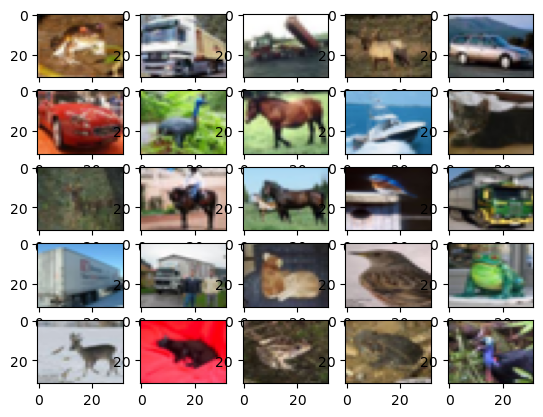

In [20]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0
 
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1
 
plt.show()

In [23]:
# number of classes
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API
# Encoder Part

# creates an input layer with the shape (32, 32, 3), representing grayscale images of size 32x32 pixels.
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)    # applies a 2D convolutional layer with 32 filters of size 3x3 to the input.
                                                                # The relu activation function is used.
x = BatchNormalization()(x) # applies BatchNormalization to the input data
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)    # Another 2D convolutional layer is applied with 32 filters of size 3x3 to 
                                                                # the output of the previous layer
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) # A 2D max pooling layer with pool size 2x2 is applied to reduce the spatial dimensions of the data.

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

# Output of the Encoder (Compressed Representation)
encoder_output = Flatten()(x)

# Encoder Model
encoder = Model(i, encoder_output, name="encoder")

In [2]:
'''
Encoder Part:

'''

# creates an input layer with the shape (32, 32, 3), representing grayscale images of size 28x28 pixels.
encoder_input = keras.Input(shape=(32, 32, 3), name="img") 

x = layers.Conv2D(16, 3, activation="relu")(encoder_input)  # applies a 2D convolutional layer with 16 filters of size 3x3 to the input.
                                                            # The relu activation function is used.
x = layers.Conv2D(32, 3, activation="relu")(x) # Another 2D convolutional layer is applied with 32 filters of size 3x3 to the output of the previous layer
x = layers.MaxPooling2D(3)(x) # A 2D max pooling layer with pool size 3x3 is applied to reduce the spatial dimensions of the data.
x = layers.Conv2D(32, 3, activation="relu")(x) #Another 2D convolutional layer is applied with 32 filters of size 3x3.
x = layers.Conv2D(16, 3, activation="relu")(x) # Another 2D convolutional layer is applied with 16 filters of size 3x3.

# The output of the encoder is obtained by applying a global max pooling operation along the spatial dimensions of the data, 
# resulting in a tensor of shape (batch_size, 16).
encoder_output = layers.GlobalMaxPooling2D()(x) 

# This line defines the encoder model, which takes the encoder_input and outputs the encoder_output. 
# It creates an instance of the keras.Model class, which represents the encoder part of the autoencoder
encoder = keras.Model(encoder_input, encoder_output, name="encoder")

encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 16)          4624      
                                                           

In [3]:
'''
Decoder Part:

decoder_input = keras.Input(shape=(16,), name="encoded_img")

'''
# Reshape layer allows us to change the dimensions of our input data. This is particularly useful when we need to prepare our data for specific types of layers or operations that require a certain input shape
x = layers.Reshape((4, 4, 1))(encoder_output) # the Reshape layer will transform the encoder_output tensor into a shape of (4, 4, 1).
x = layers.Conv2DTranspose(16, 3, activation="relu")(x) # A 2D transposed convolutional layer (deconvolutional layer) with 16 filters of size 3x3 is applied.
x = layers.Conv2DTranspose(32, 3, activation="relu")(x) # Another 2D transposed convolutional layer with 32 filters of size 3x3 is applied.
x = layers.UpSampling2D(3)(x) # An upsampling layer is applied, which increases the spatial dimensions of the data by a factor of 3.
x = layers.Conv2DTranspose(16, 3, activation="relu")(x) # Another 2D transposed convolutional layer with 16 filters of size 3x3 is applied.
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x) # The final layer applies a 2D transposed convolutional layer with 1 filter of size 3x3, 
                                                                    # which produces the decoder output.

'''
Autoencoder Model:

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder"): 
This line defines the autoencoder model, which takes the encoder_input and outputs the decoder_output. 
It creates an instance of the keras.Model class, which represents the complete autoencoder model.
'''

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

''' 
The code defines an autoencoder architecture, consisting of an encoder part followed by a decoder part. 
The autoencoder is a type of neural network used for unsupervised learning, 
where it attempts to reconstruct the input data at its output, thus learning a compressed representation (latent space)
 of the input data. The encoder part compresses the input data into a lower-dimensional representation, 
 and the decoder part tries to reconstruct the original data from this representation.
 '''

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 16)          4624      
                                                       

' \nThe code defines an autoencoder architecture, consisting of an encoder part followed by a decoder part. \nThe autoencoder is a type of neural network used for unsupervised learning, \nwhere it attempts to reconstruct the input data at its output, thus learning a compressed representation (latent space)\n of the input data. The encoder part compresses the input data into a lower-dimensional representation, \n and the decoder part tries to reconstruct the original data from this representation.\n '

In [4]:
# Compiling models

'''
This is the step to define weigths
If you do not compile metrics or evaluate your model, you'll receive a warning:
WARNING:tensorflow:Compiled the loaded model, but the compiled metrics have yet to be built.
`model.compile_metrics` will be empty until you train or evaluate the model.
'''

encoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

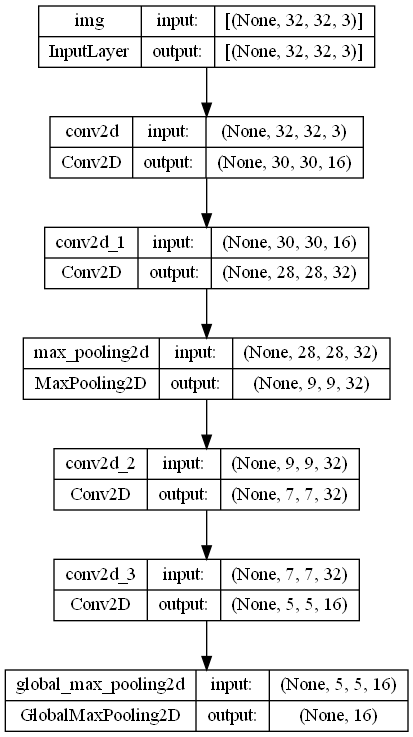

In [5]:
# plot the autoencoder
from tensorflow.keras.utils import plot_model

plot_model(encoder, 'encoder_compress.png', show_shapes=True)

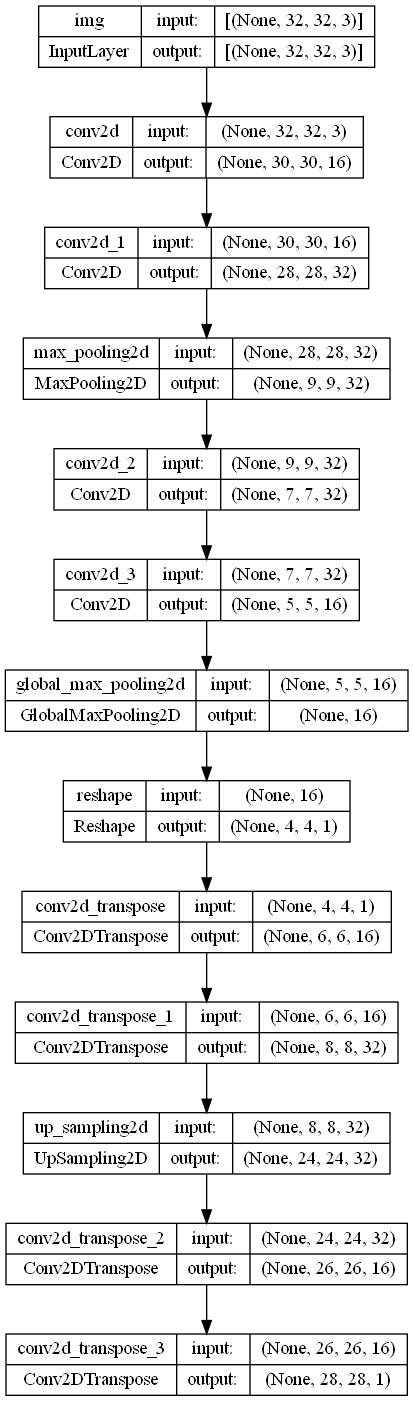

In [6]:
plot_model(autoencoder, 'autoencoder_compress.png', show_shapes=True)

In [16]:
# Show data

import numpy as np
import matplotlib.pyplot as plt

# Select an image index from the training set (you can change the index to display different images)
image_index = np.random.randint(50000)

# Get the image and its corresponding label from the training set
image = x_train[image_index]
label = y_train[image_index]


# Define the class names for CIFAR-10 (these are the label names for each class)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


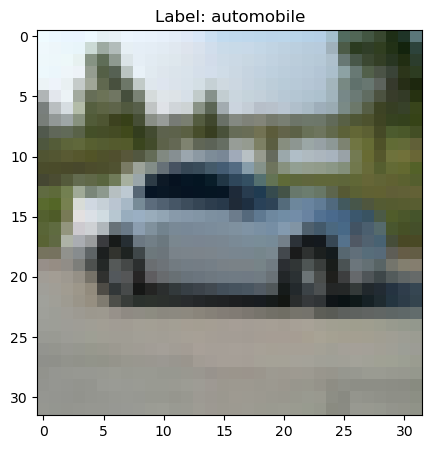

In [19]:
# Display the image

plt.figure(figsize=(5, 5))
plt.title(f"Label: {class_names[label[0]]}")
plt.axis('on')
plt.imshow(image)
plt.show()

In [56]:

# fit the autoencoder model to reconstruct input
history = encoder.fit(x_train, y_train, epochs=4, batch_size=32, verbose=2, validation_data=(x_test, y_test))


Epoch 1/100
1563/1563 - 114s - loss: -3.7786e+01 - val_loss: -3.8025e+01 - 114s/epoch - 73ms/step
Epoch 2/100
1563/1563 - 141s - loss: -4.5505e+01 - val_loss: -4.5698e+01 - 141s/epoch - 90ms/step
Epoch 3/100
1563/1563 - 184s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 184s/epoch - 118ms/step
Epoch 4/100
1563/1563 - 111s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 111s/epoch - 71ms/step
Epoch 5/100
1563/1563 - 112s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 112s/epoch - 71ms/step
Epoch 6/100
1563/1563 - 118s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 118s/epoch - 76ms/step
Epoch 7/100
1563/1563 - 112s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 112s/epoch - 72ms/step
Epoch 8/100
1563/1563 - 113s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 113s/epoch - 72ms/step
Epoch 9/100
1563/1563 - 113s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 113s/epoch - 72ms/step
Epoch 10/100
1563/1563 - 111s - loss: -4.5698e+01 - val_loss: -4.5698e+01 - 111s/epoch - 71ms/step
Epoch 11/100
1563/

KeyboardInterrupt: 

In [ ]:
# https://towardsdatascience.com/transfer-learning-on-greyscale-images-how-to-fine-tune-pretrained-models-on-black-and-white-9a5150755c7a
# https://www.projectpro.io/recipes/run-and-fit-data-with-keras-model
# https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
# https://keras.io/examples/


In [44]:
# Saving

encoder.save("functional_autoenconder_model.keras")
autoencoder.save("functional_enconder_model.keras")

In [24]:
'''
In the example above, the stack of layers instantiate two models:
- an encoder model that turns image inputs into 16-dimensional vectors, 
- and an end-to-end autoencoder model for training.

Bellow, there's a different take on the autoencoder example that creates an encoder model, 
a decoder model, and chains them in two calls to obtain the autoencoder model:

'''

# 1st model
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

# 2nd model
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [25]:
'''
This code defines an autoencoder model using the Keras functional API.
In the given code, encoder(autoencoder_input) treats the encoder model as a function 
that takes the autoencoder_input tensor as input and produces the encoded_img tensor as output. 
It applies the encoder model to the input data to obtain the compressed representation in the latent space.

The code defines an autoencoder architecture, consisting of an encoder part followed by a decoder part. 
The autoencoder is a type of neural network used for unsupervised learning, where it attempts to 
reconstruct the input data at its output, thus learning a compressed representation (latent space) of the input data. 
The encoder part compresses the input data into a lower-dimensional representation, and the decoder part tries to 
reconstruct the original data from this representation.

'''

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img") #creates an input layer for the autoencoder model.

encoded_img = encoder(autoencoder_input)    # The code passes the autoencoder_input through the previously defined encoder model (encoder).
                                            # This operation compresses the input images into a lower-dimensional representation (latent space) 
                                            # using the encoder.

decoded_img = decoder(encoded_img)  # The code then takes the output of the encoder (encoded_img) 
                                    # and passes it through the previously defined decoder model (decoder). 
                                    # This operation reconstructs the original images from the compressed representation 
                                    # in the latent space using the decoder.

autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")   # The autoencoder takes the autoencoder_input and outputs 
                                                                                # the decoded_img, representing the reconstructed images. 
                                                                                # It creates an instance of the keras.Model 

autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [27]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 original_img (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

In [28]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoded_img (InputLayer)    [(None, 16)]              0         
                                                                 
 reshape_1 (Reshape)         (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 6, 6, 16)         160       
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 8, 8, 32)         4640      
 ranspose)                                                       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                           